In [77]:
!pip install kagglehub
!pip install wordcloud
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.6 MB/s eta 0:00:00


In [3]:
import kagglehub

path = kagglehub.dataset_download("kazanova/sentiment140")


100%|██████████████████████████████████████| 80.9M/80.9M [00:19<00:00, 4.42MB/s]

Extracting files...


In [53]:
import pandas as pd
path = "/Users/seonwoo/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2/training.1600000.processed.noemoticon.csv"
data = pd.read_csv(path,encoding="latin1", names=["sentiment", "id", "upload_time","flag","username","text"])

## 데이터셋 파악하기
- 컬럼 0(감정) : 0이면 부정, 2이면 중립, 4이면 긍정이다. 실제 데이터는 0과 4로 구성되어있다.
- 컬럼 1(ID)
- 컬럼 2(업로드 시간)
- 컬럼 3(Flag) : query or 'NO_QUERY' 이지만 실제 데이터 셋에는 NO_QUERY 만 존재한다.
- 컬럼 4(Username)
- 컬럼 5(내용)

## Word Cloud
- 메타 데이터에서 얻어진 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 늘어놓아 표시하는 것.
- 중요도 혹은 인기도에 따라 글자의 색상이나 굵기 등 형태가 변한다.

In [80]:
import matplotlib.pyplot as plt
import wordcloud
import re
from collections import Counter
from random import sample
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [54]:
# 데이터 확인하기
data.head()

,sentiment,id,upload_time,flag,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
# 데이터 shape 확인하기
data.shape

(1600000, 6)

In [56]:
# 각각의 컬럼 데이터 value_counts 확인하기
data["flag"].value_counts()

flag
NO_QUERY    1600000
Name: count, dtype: int64

In [57]:
# 전처리 하기
df_positive = data[data["sentiment"] == 4]
df_negative = data[data["sentiment"] == 0]

df_positive["text"] = df_positive["text"].apply(lambda s : re.sub("[^a-zA-Z ]","",s))
df_negative["text"] = df_negative["text"].apply(lambda s : re.sub("[^a-zA-Z ]","",s))

positive_texts = " ".join(df_positive["text"])
negative_texts = " ".join(df_negative["text"])
# stopword 같은 것도 넣을 수 있을듯

/var/folders/cw/5cxz2ybs5ls_6q0108849sb40000gn/T/ipykernel_33526/2957567198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive["text"] = df_positive["text"].apply(lambda s : re.sub("[^a-zA-Z ]","",s))
/var/folders/cw/5cxz2ybs5ls_6q0108849sb40000gn/T/ipykernel_33526/2957567198.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative["text"] = df_negative["text"].apply(lambda s : re.sub("[^a-zA-Z ]","",s))


In [59]:
# wordcloud 사용하기
# 내부에서 stopword 를 걸러주는 거 같음..
word_cloud_positive = wordcloud.WordCloud(
    max_words = 200, width = 2000, height = 1000)
words_positive = word_cloud_positive.generate(positive_texts)

word_cloud_negative = wordcloud.WordCloud(
    max_words = 200, width = 2000, height = 1000)
words_negative = word_cloud_negative.generate(negative_texts)

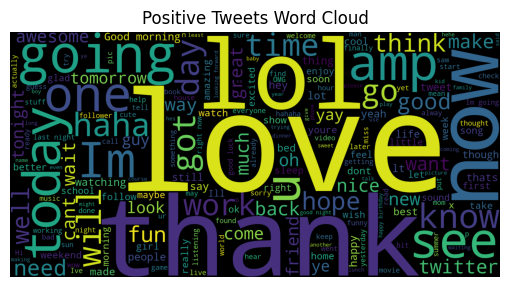

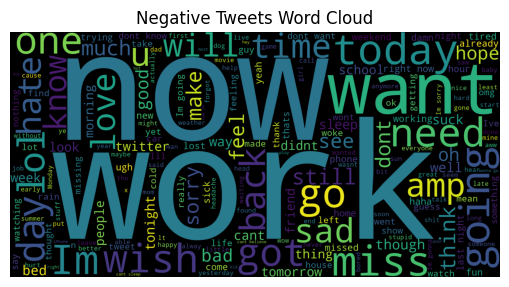

In [75]:
plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
plt.imshow(words_positive)
plt.axis("off")
plt.title("Positive Tweets Word Cloud")

plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
plt.imshow(words_negative)
plt.axis("off")
plt.title("Negative Tweets Word Cloud")

plt.show()

In [81]:
stop_words = set(stopwords.words('english'))

In [84]:
# Sampling 하기
# 직접 Sampling 하기 -> word cloud에서 stopword 제거가 안됨.
# 직접 stopword 제거해주기
positive_sampling_text = []
negative_sampling_text = []

for word in positive_texts.split():
    word = word.lower()
    if word not in stop_words :
        positive_sampling_text.append(word)

for word in negative_texts.split():
    word = word.lower()
    if word not in stop_words :
        negative_sampling_text.append(word)

positive_texts_frequency = Counter(positive_sampling_text)
negative_texts_frequency = Counter(negative_sampling_text)

word_cloud_positive_made = wordcloud.WordCloud(
    max_words = 200, width = 2000, height = 1000)
words_positive_made = word_cloud_positive_made.generate_from_frequencies(positive_texts_frequency)

word_cloud_negative_made = wordcloud.WordCloud(
    max_words = 200, width = 2000, height = 1000)
words_negative_made = word_cloud_negative_made.generate_from_frequencies(negative_texts_frequency)

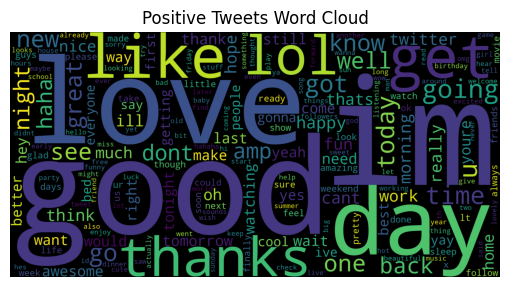

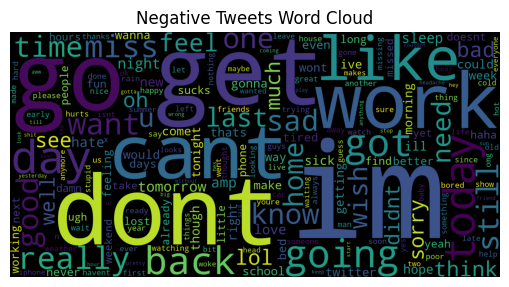

In [85]:
plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
plt.imshow(words_positive_made)
plt.axis("off")
plt.title("Positive Tweets Word Cloud")

plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
plt.imshow(words_negative_made)
plt.axis("off")
plt.title("Negative Tweets Word Cloud")

plt.show()